# Semantic Segmentation (`semseg`)

based on [camvid.ipynb](./camvid.ipynb).

In [1]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '0'

import numpy as np
import torch
from abcli import fullname
from abcli import string
from abcli.modules import objects
from abcli.plugins import seed
from roofAI.semseg.augmentation import get_training_augmentation, get_validation_augmentation, get_preprocessing
from roofAI.semseg.dataloader import Dataset
from roofAI.semseg.train import SemSegModelTrainer
from roofAI.semseg.utils import visualize
from roofAI.semseg import Profile
from torch.utils.data import DataLoader
import segmentation_models_pytorch as smp
import abcli.logging
import logging

logger = logging.getLogger()

logger.info(f"{fullname()}, built on {string.pretty_date()}")

Found credentials in shared credentials file: ~/.aws/credentials
/usr/local/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
abcli-7.2362.1-unknown, built on 09 October 2023, 14:30:23


In [2]:
profile = Profile.QUICK # FULL, QUICK, VALIDATION
dataset_object = "roofAI-CamVid-v2"
model_object = objects.unique_object("roofAI-CamVid-semseg-model")

📂 roofAI-CamVid-semseg-model-2023-10-09-14-30-23-78184


SemSegModelTrainer: /Users/kamangir/storage/abcli/roofAI-CamVid-v2/SegNet-Tutorial/CamVid/ -Profile.QUICK-> /Users/kamangir/storage/abcli/roofAI-CamVid-semseg-model-2023-10-09-14-30-23-78184
data review


Dataset: 20 item(s).


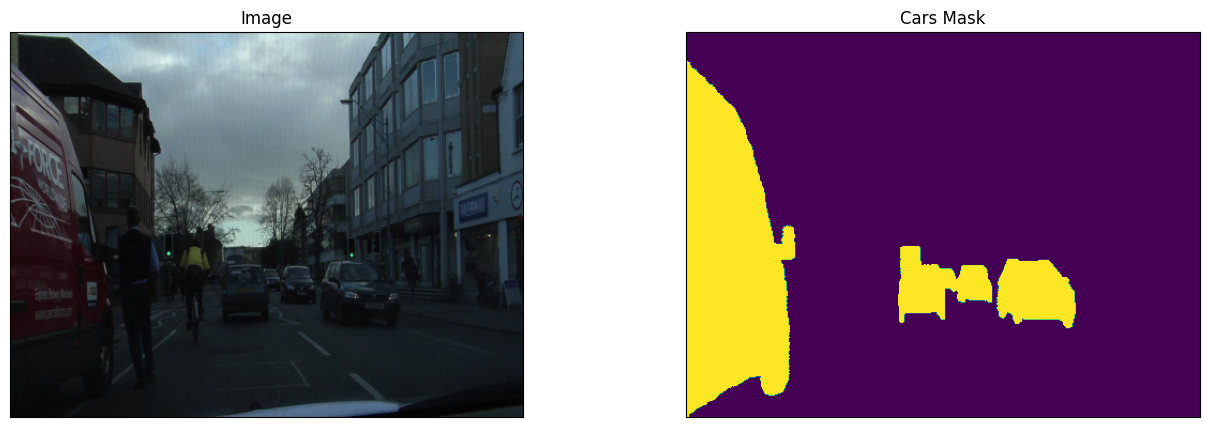

/usr/local/lib/python3.11/site-packages/albumentations/imgaug/transforms.py:261: FutureWarning: IAAAdditiveGaussianNoise is deprecated. Please use GaussNoise instead
  warnings.warn("IAAAdditiveGaussianNoise is deprecated. Please use GaussNoise instead", FutureWarning)
/usr/local/lib/python3.11/site-packages/albumentations/imgaug/transforms.py:384: FutureWarning: This IAAPerspective is deprecated. Please use Perspective instead
  warnings.warn("This IAAPerspective is deprecated. Please use Perspective instead", FutureWarning)
/usr/local/lib/python3.11/site-packages/albumentations/augmentations/transforms.py:1258: FutureWarning: This class has been deprecated. Please use RandomBrightnessContrast
  warnings.warn(
/usr/local/lib/python3.11/site-packages/albumentations/imgaug/transforms.py:231: FutureWarning: IAASharpen is deprecated. Please use Sharpen instead
  warnings.warn("IAASharpen is deprecated. Please use Sharpen instead", FutureWarning)
/usr/local/lib/python3.11/site-packages/alb

Dataset: 20 item(s).


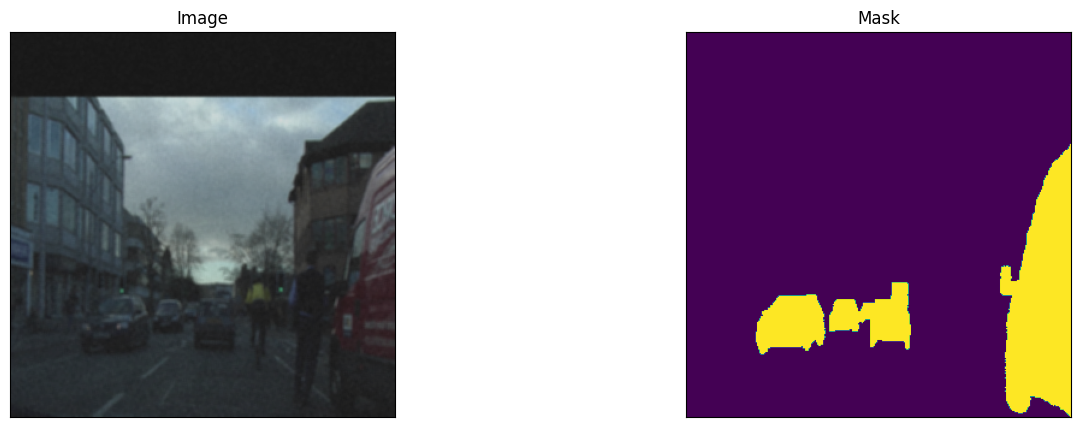

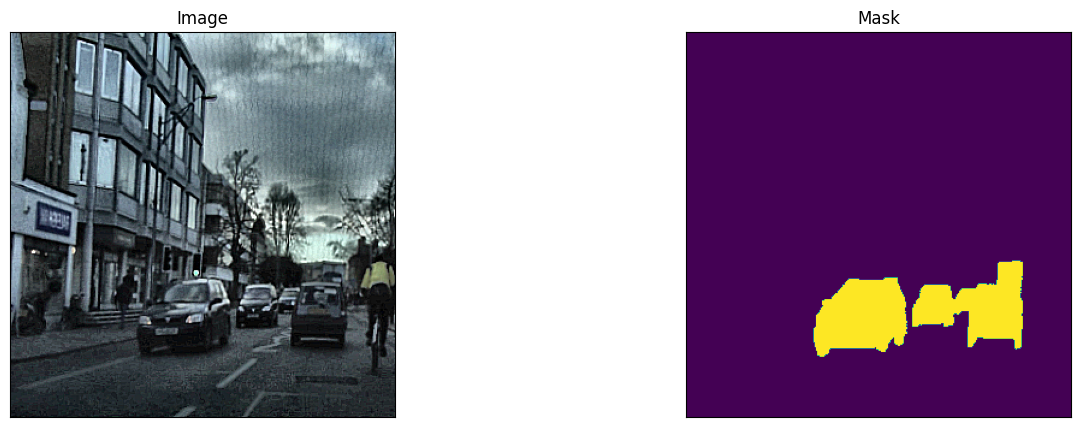

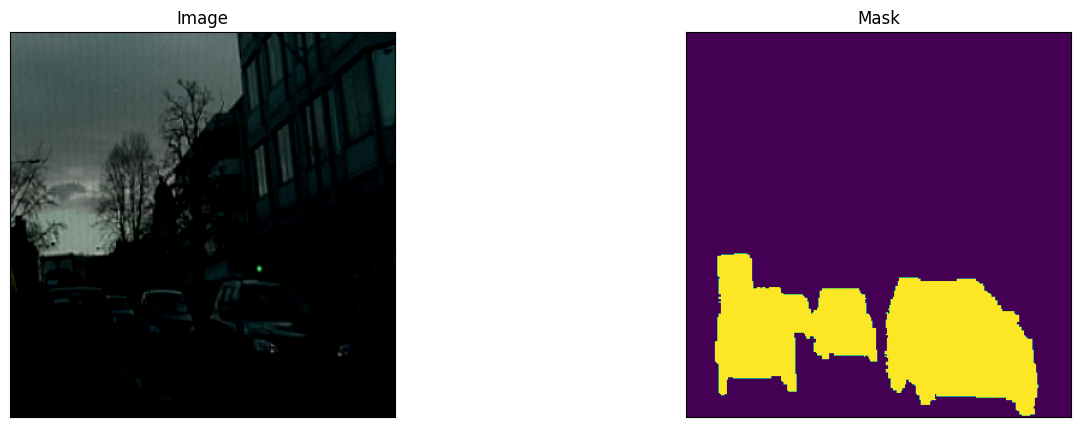

In [3]:
trainer = SemSegModelTrainer(
    dataset_path=objects.path_of(
        "SegNet-Tutorial/CamVid/", 
        object_name=dataset_object
    ),
    model_path=objects.object_path(object_name=model_object),
    in_notebook=True,
    profile=profile,
)

In [4]:
model = trainer.train()

SemSegModelTrainer.train -cpu:sigmoid-> se_resnext50_32x4d[imagenet]: car
epoch: #1/10


Dataset: 20 item(s).
Dataset: 20 item(s).
valid: 100%|██████████| 20/20 [00:14<00:00,  1.39it/s, dice_loss - 0.9532, iou_score - 0.02403]


-> /Users/kamangir/storage/abcli/roofAI-CamVid-semseg-model-2023-10-09-14-30-23-78184/model.pth
epoch: #2/10


valid: 100%|██████████| 20/20 [00:17<00:00,  1.17it/s, dice_loss - 0.8946, iou_score - 0.06977]


-> /Users/kamangir/storage/abcli/roofAI-CamVid-semseg-model-2023-10-09-14-30-23-78184/model.pth
epoch: #3/10


valid: 100%|██████████| 20/20 [00:16<00:00,  1.18it/s, dice_loss - 0.7347, iou_score - 0.2283]  


-> /Users/kamangir/storage/abcli/roofAI-CamVid-semseg-model-2023-10-09-14-30-23-78184/model.pth
epoch: #4/10


valid: 100%|██████████| 20/20 [00:17<00:00,  1.13it/s, dice_loss - 0.6974, iou_score - 0.2533]  


-> /Users/kamangir/storage/abcli/roofAI-CamVid-semseg-model-2023-10-09-14-30-23-78184/model.pth
epoch: #5/10


valid: 100%|██████████| 20/20 [00:17<00:00,  1.15it/s, dice_loss - 0.6882, iou_score - 0.2676]  


-> /Users/kamangir/storage/abcli/roofAI-CamVid-semseg-model-2023-10-09-14-30-23-78184/model.pth
epoch: #6/10


valid: 100%|██████████| 20/20 [00:17<00:00,  1.16it/s, dice_loss - 0.6186, iou_score - 0.2897]  


-> /Users/kamangir/storage/abcli/roofAI-CamVid-semseg-model-2023-10-09-14-30-23-78184/model.pth
epoch: #7/10


valid: 100%|██████████| 20/20 [00:16<00:00,  1.19it/s, dice_loss - 0.5396, iou_score - 0.3648]


-> /Users/kamangir/storage/abcli/roofAI-CamVid-semseg-model-2023-10-09-14-30-23-78184/model.pth
epoch: #8/10


valid: 100%|██████████| 20/20 [00:15<00:00,  1.27it/s, dice_loss - 0.5549, iou_score - 0.3425]

epoch: #9/10



valid: 100%|██████████| 20/20 [00:16<00:00,  1.19it/s, dice_loss - 0.6766, iou_score - 0.2636]  

epoch: #10/10



valid: 100%|██████████| 20/20 [00:17<00:00,  1.15it/s, dice_loss - 0.7173, iou_score - 0.225]   

SemSegModel.load(/Users/kamangir/storage/abcli/roofAI-CamVid-semseg-model-2023-10-09-14-30-23-78184/model.pth)
SemSegModel: sigmoid-se_resnext50_32x4d[imagenet]: car



Dataset: 20 item(s).
valid: 100%|██████████| 20/20 [00:16<00:00,  1.18it/s, dice_loss - 0.5921, iou_score - 0.3163]


## Visualize predictions

In [5]:
# test dataset without transformations for image visualization
test_dataset_vis = Dataset(
    trainer.x_test_dir,
    trainer.y_test_dir, 
    classes=model.classes,
    count=profile.data_count
)

Dataset: 20 item(s).


In [6]:
preprocessing_fn = smp.encoders.get_preprocessing_fn(
    model.encoder_name,
    model.encoder_weights,
)

In [7]:
test_dataset = Dataset(
    trainer.x_test_dir,
    trainer.y_test_dir,
    augmentation=get_validation_augmentation(),
    preprocessing=get_preprocessing(preprocessing_fn),
    classes=model.classes,
    count=profile.data_count,
)

Dataset: 20 item(s).


In [8]:
DEVICE="cpu"  # 'cuda'

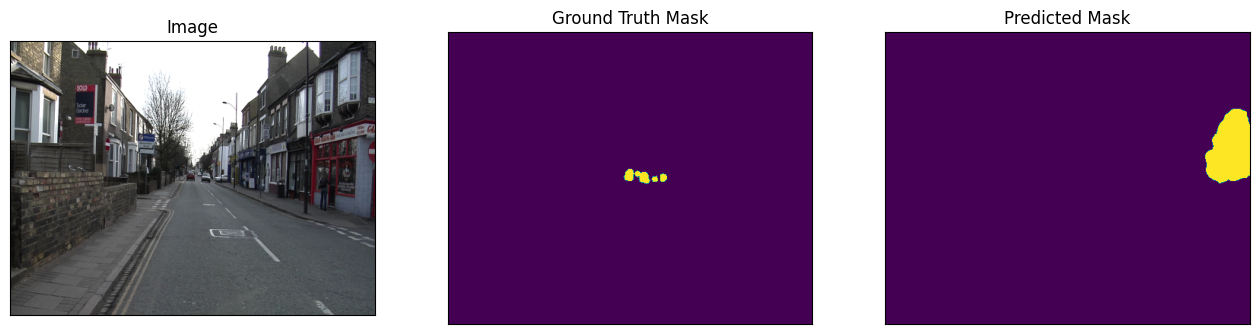

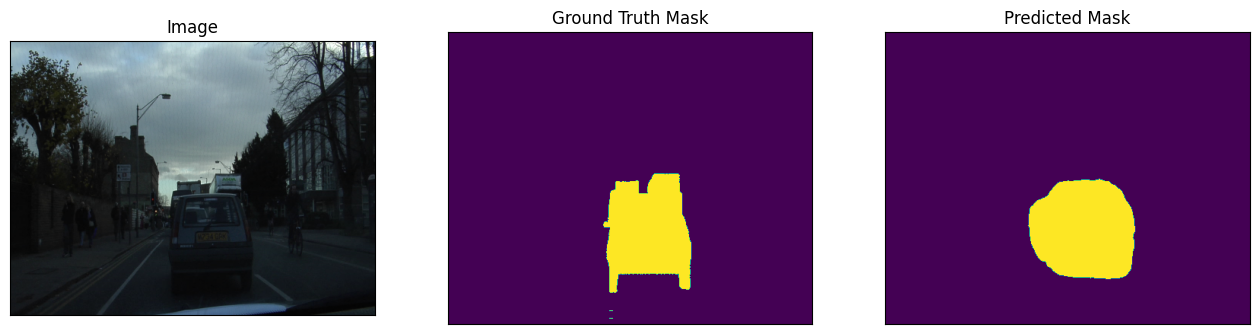

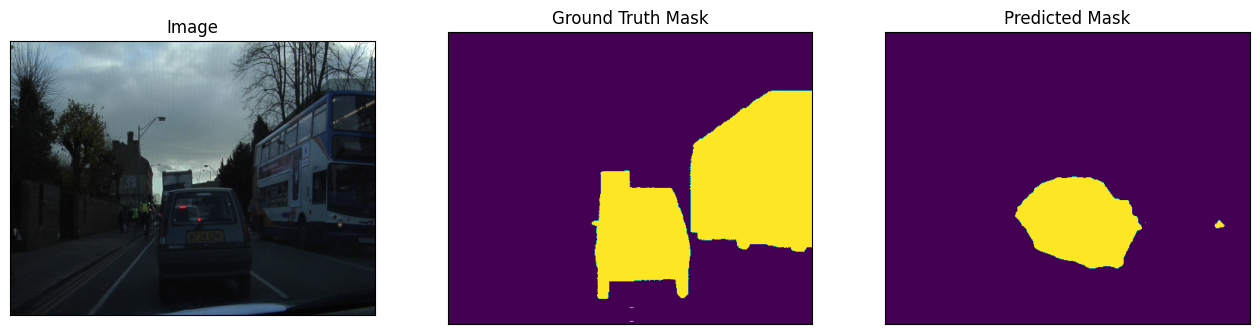

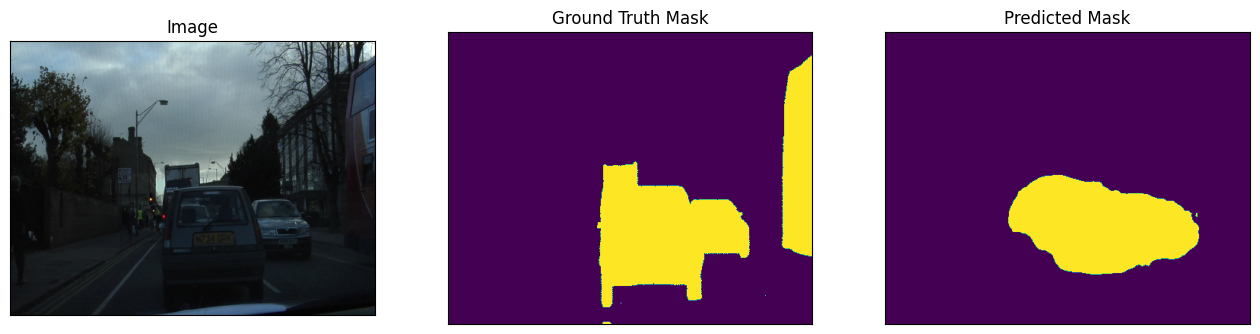

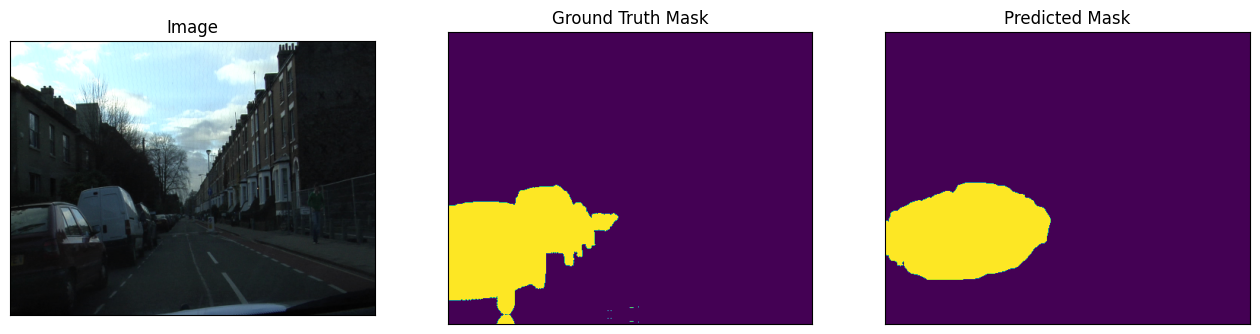

In [9]:
for i in range(1 if profile == Profile.VALIDATION else 5):
    n = np.random.choice(len(test_dataset))
    
    image_vis = test_dataset_vis[n][0].astype('uint8')
    image, gt_mask = test_dataset[n]
    
    gt_mask = gt_mask.squeeze()
    
    x_tensor = torch.from_numpy(image).to(DEVICE).unsqueeze(0)
    pr_mask = model.model.predict(x_tensor)
    pr_mask = (pr_mask.squeeze().cpu().numpy().round())
        
    visualize(
        image=image_vis, 
        ground_truth_mask=gt_mask, 
        predicted_mask=pr_mask
    )

In [10]:
%%bash -s $model_object
source ~/git/awesome-bash-cli/bash/abcli.sh in_notebook

abcli select $1
abcli tag set . built_by_notebook
# abcli upload

📂 abcli: roofAI-CamVid-semseg-model-2023-10-09-14-30-23-78184


roofAI-CamVid-semseg-model-2023-10-09-14-30-23-78184 += #built_by_notebook.


In [11]:
seed.log(
    "download_object",
    object_name=model_object)

abcli select roofAI-CamVid-semseg-model-2023-10-09-14-30-23-78184
abcli download
open .


In [12]:
# END